# Loan Status
-[Rishit Dagli](rishitdagli.ml)

The dataset can be received from here - http://iali.in/datasets/loan_status_train.csv

### Some imports

In [118]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow import feature_column
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers

### Loading Data

In [132]:
train_df = pd.read_csv("Loan Status/loan_status_train.csv")

### Some preprocessing

view some values

In [133]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Remove N/A s

In [134]:
train_df.dropna(inplace=True)
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Drop the Loan_ID column

In [135]:
train_df.drop(['Loan_ID'], axis = 1, inplace = True)

Lets make an interactive visualization

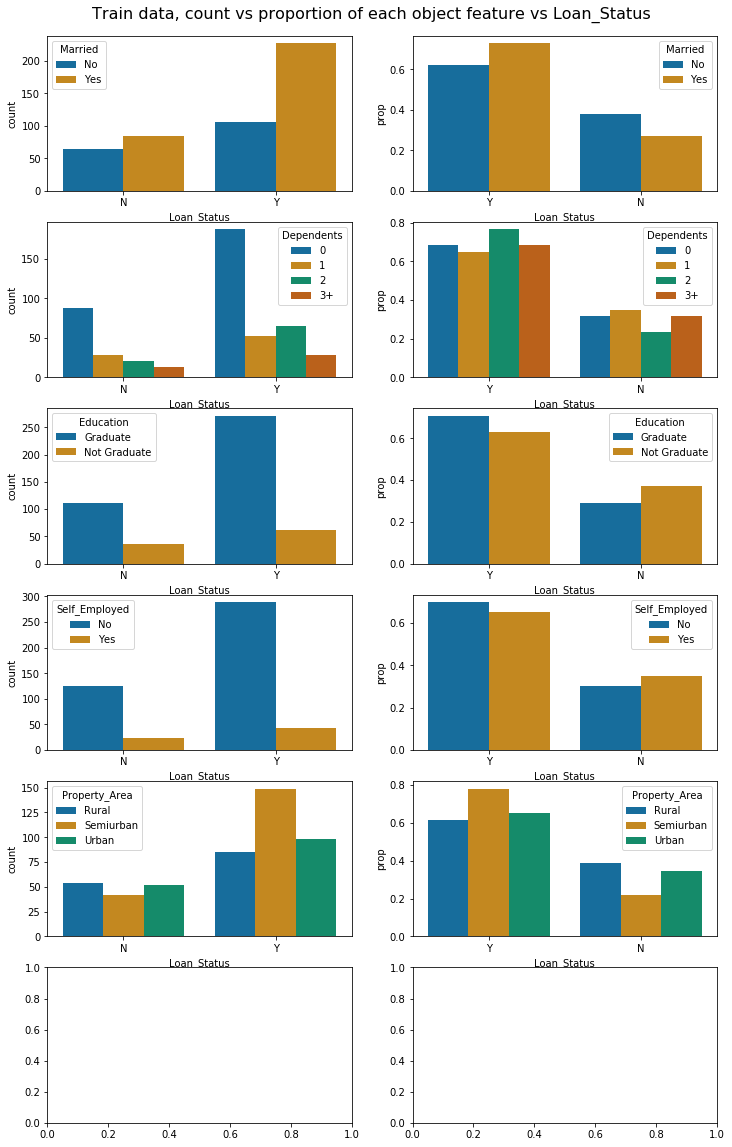

In [136]:
current_palette = sns.color_palette('colorblind')
def prop_check(data):
    f, axes = plt.subplots(6,2,figsize= (12,20))
    plt.suptitle('Train data, count vs proportion of each object feature vs Loan_Status', size =16, y = 0.9)
    col = data.columns[1:data.shape[1]-1]
    r = 0
    for i in col:
        if (data.dtypes == 'object')[i]:        
            data_prop = (data['Loan_Status']
                          .groupby(data[i])
                          .value_counts(normalize = True)
                          .rename('prop')
                          .reset_index())
            sns.countplot(data = data, 
                          x ='Loan_Status', 
                          hue = i, 
                          ax = axes[r,0], 
                          hue_order=data_prop[i].unique(), 
                          palette=current_palette)
            sns.barplot(data = data_prop, 
                        x = 'Loan_Status', 
                        y = 'prop',
                        hue = i,
                        ax = axes[r,1],
                        palette=current_palette)
            r = r+1
prop_check(train_df)

In [137]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Categorize the data, neural nets understand numbers

In [138]:
def categorize(data):
    data.Gender.replace({'Male': 0, 'Female': 1}, inplace = True)
    data.Married.replace({'Yes':0, 'No':1}, inplace = True)
    data.Dependents.replace({'3+' : 3}, inplace = True)
    data.Education.replace({'Graduate' : 0, 'Not Graduate': 1}, inplace = True)
    data.Self_Employed.replace({'Yes':0, 'No':1}, inplace = True)
    data.Property_Area.replace({'Urban' : 0, 'Semiurban' : 1, 'Rural' : 2}, inplace = True)
    data.Loan_Status.replace({'Y':0, 'N':1}, inplace = True)
    return data    

In [139]:
train_df = categorize(train_df)

### Splits

Create train, test and validation splits

In [140]:
temp, test = train_test_split(train_df, test_size=0.2)
train, val = train_test_split(temp, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

307 train examples
77 validation examples
96 test examples


X, y splits

In [141]:
def x_y_split(data):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    return np.array(x, dtype=float), np.array(y, dtype=float)

In [142]:
x_train, y_train = x_y_split(train)
x_val, y_val = x_y_split(val)
x_test, y_test = x_y_split(test)

### Lets make a model!

In [1]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'tanh'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

NameError: name 'tf' is not defined

In [191]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['acc']
)

In [192]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    epochs = 50,
)

Train on 307 samples, validate on 77 samples
Epoch 1/50
307/307 [==============================] - 1s 2ms/sample - loss: 0.8100 - acc: 0.5896 - val_loss: 0.6365 - val_acc: 0.6883
Epoch 2/50
307/307 [==============================] - 0s 180us/sample - loss: 0.6536 - acc: 0.6678 - val_loss: 0.7952 - val_acc: 0.4156
Epoch 3/50
307/307 [==============================] - 0s 172us/sample - loss: 0.6848 - acc: 0.6287 - val_loss: 0.6333 - val_acc: 0.6883
Epoch 4/50
307/307 [==============================] - 0s 175us/sample - loss: 0.6449 - acc: 0.6906 - val_loss: 0.6302 - val_acc: 0.6883
Epoch 5/50
307/307 [==============================] - 0s 175us/sample - loss: 0.6244 - acc: 0.6906 - val_loss: 0.6192 - val_acc: 0.6883
Epoch 6/50
307/307 [==============================] - 0s 184us/sample - loss: 0.6165 - acc: 0.6873 - val_loss: 0.6285 - val_acc: 0.6883
Epoch 7/50
307/307 [==============================] - 0s 170us/sample - loss: 0.6184 - acc: 0.6906 - val_loss: 0.6208 - val_acc: 0.6753
Epoch

Not that good accuracy! Lets use some other algos

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sklearn

Try Linear, Ridge and Lasso models

#### Linear

In [196]:
regressor = LinearRegression()
X_train, Y_train = x_y_split(temp)
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
regressor.score(x_test, y_test)

0.22987449734244048

#### Ridge

In [202]:
regressor = sklearn.linear_model.Ridge()
regressor.fit(X_train, Y_train)
regressor.score(x_test, y_test)

0.2303940507014577

#### Lasso

In [203]:
regressor = sklearn.linear_model.Lasso()
regressor.fit(X_train, Y_train)
regressor.score(x_test, y_test)

0.00867699095484542

### Conclusion

Lasso gives us a good accuracy on the test data so I guess thats good